In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
# from census import Census
# from us import states

In [3]:
# states.lookup('DC')

In [4]:
df = pd.read_csv('us-daily.csv', \
                 parse_dates=True)

In [5]:
df

,date,states,positive,negative,posNeg,pending,hospitalized,death,total
0,20200324,56,51970,292758,344728,14433,4468.0,675.0,359161
1,20200323,56,42164,237321,279485,14571,3325.0,471.0,294056
2,20200322,56,31888,193463,225351,2842,2554.0,398.0,228216
3,20200321,56,23203,155909,179112,3477,1964.0,272.0,182589
4,20200320,56,17038,118147,135185,3336,NaN,219.0,138521
5,20200319,56,11723,89119,100842,3025,NaN,160.0,103867
6,20200318,56,7731,66225,73956,2538,NaN,112.0,76495
7,20200317,56,5723,47604,53327,1687,NaN,90.0,54957
8,20200316,56,4019,36104,40123,1691,NaN,71.0,41714
9,20200315,51,3173,22548,25721,2242,NaN,60.0,27963


In [6]:
df.columns

Index(['date', 'states', 'positive', 'negative', 'posNeg', 'pending',
       'hospitalized', 'death', 'total'],
      dtype='object')

In [7]:
df.index = pd.to_datetime(df['date'], format='%Y%m%d')

In [8]:
df.index.name = 'Date'

In [9]:
df.sort_index(inplace=True)

In [10]:
df['posNeg_daily'] = df['posNeg'].diff()

In [11]:
df['positive_daily'] = df['positive'].diff()

Text(0.5, 0, 'Date')

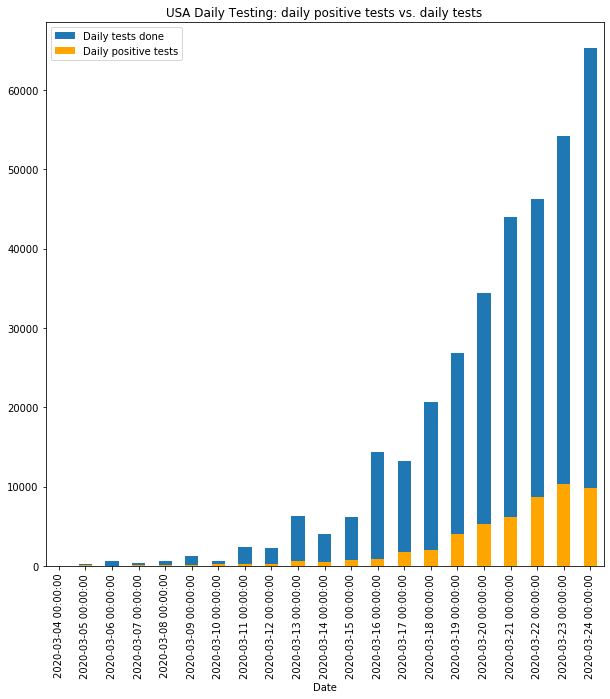

In [12]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

df['posNeg'].diff().plot(label="Daily tests done",kind="bar")
df['positive'].diff().plot(label="Daily positive tests",kind="bar",color="orange")

axes.legend()
axes.set_title("USA Daily Testing: daily positive tests vs. daily tests")
axes.set_xlabel("Date")

(0, 34.509661579462275)

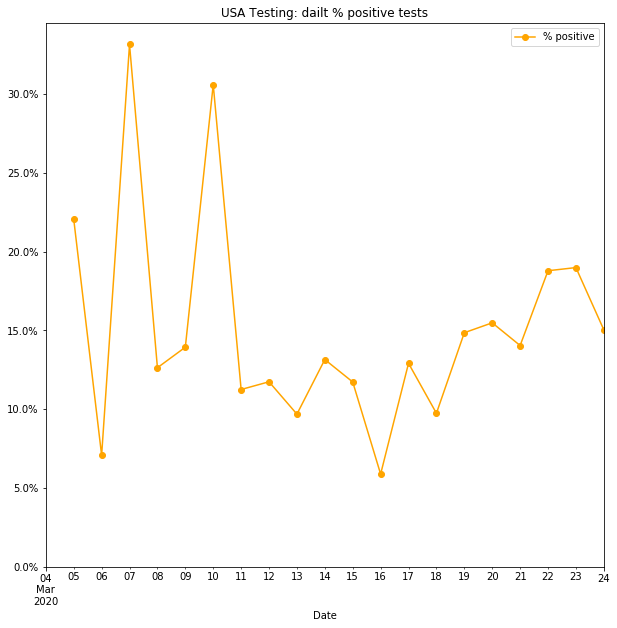

In [13]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

(df['positive'].diff() / df['posNeg'].diff() * 100.).plot(marker='o', label="% positive", color="orange")

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("USA Testing: dailt % positive tests")
axes.set_xlabel("Date")
axes.set_ylim(0)

In [14]:
# for index, row in df.iterrows():
#     print(pd.to_datetime(row['date'], format='%Y%m%d').strftime("%Y%m%d"), row['posNeg_daily'])